<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importation" data-toc-modified-id="Importation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importation</a></span><ul class="toc-item"><li><span><a href="#Requette" data-toc-modified-id="Requette-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Requette</a></span></li><li><span><a href="#Traitement-initial" data-toc-modified-id="Traitement-initial-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Traitement initial</a></span></li><li><span><a href="#Outils-généraux" data-toc-modified-id="Outils-généraux-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Outils généraux</a></span></li></ul></li><li><span><a href="#Suppression-du-bruit" data-toc-modified-id="Suppression-du-bruit-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Suppression du bruit</a></span><ul class="toc-item"><li><span><a href="#Code-HTML" data-toc-modified-id="Code-HTML-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Code HTML</a></span></li></ul></li><li><span><a href="#Trop-long" data-toc-modified-id="Trop-long-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Trop long</a></span><ul class="toc-item"><li><span><a href="#Contraction" data-toc-modified-id="Contraction-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Contraction</a></span></li><li><span><a href="#Correction-(non-effectué)" data-toc-modified-id="Correction-(non-effectué)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Correction (non effectué)</a></span></li><li><span><a href="#Minuscules" data-toc-modified-id="Minuscules-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Minuscules</a></span></li><li><span><a href="#Nombres" data-toc-modified-id="Nombres-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Nombres</a></span></li><li><span><a href="#Caractères-seuls" data-toc-modified-id="Caractères-seuls-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Caractères seuls</a></span></li></ul></li><li><span><a href="#Stopwords" data-toc-modified-id="Stopwords-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Stopwords</a></span><ul class="toc-item"><li><span><a href="#Mots-les-plus-fréquents" data-toc-modified-id="Mots-les-plus-fréquents-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Mots les plus fréquents</a></span></li><li><span><a href="#Adjectifs" data-toc-modified-id="Adjectifs-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Adjectifs</a></span></li></ul></li><li><span><a href="#Stemming" data-toc-modified-id="Stemming-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stemming</a></span></li><li><span><a href="#Lemmatisation-(non-effectué)" data-toc-modified-id="Lemmatisation-(non-effectué)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Lemmatisation (non effectué)</a></span></li><li><span><a href="#Fusion" data-toc-modified-id="Fusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Fusion</a></span></li><li><span><a href="#Traitement-des-Tags" data-toc-modified-id="Traitement-des-Tags-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Traitement des Tags</a></span></li><li><span><a href="#Tokenisation" data-toc-modified-id="Tokenisation-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Tokenisation</a></span><ul class="toc-item"><li><span><a href="#Fréquences" data-toc-modified-id="Fréquences-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Fréquences</a></span></li><li><span><a href="#Mots-communs" data-toc-modified-id="Mots-communs-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Mots communs</a></span></li></ul></li><li><span><a href="#Sauvegarde" data-toc-modified-id="Sauvegarde-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Sauvegarde</a></span></li></ul></div>

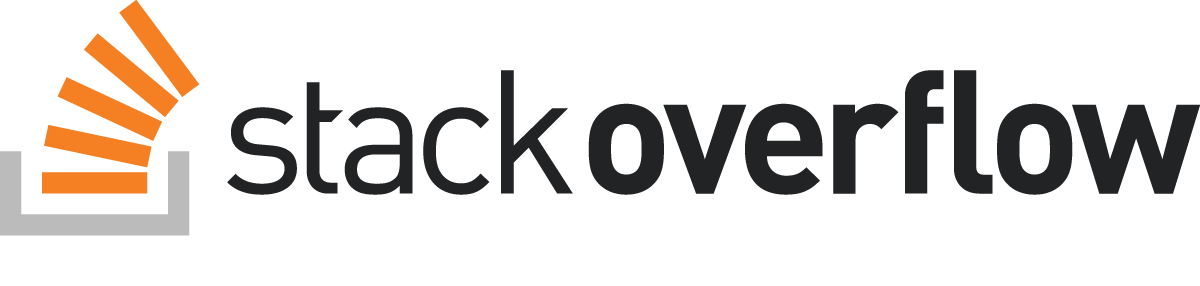

---
Projet 5 - Catégorisez automatiquement des questions <a class="tocSkip">
===

Stack Overflow est un site célèbre de questions-réponses liées au développement informatique. Pour poser une question sur ce site, il faut entrer plusieurs tags de manière à retrouver facilement la question par la suite. Pour les utilisateurs expérimentés, cela ne pose pas de problème, mais pour les nouveaux utilisateurs, il serait judicieux de suggérer quelques tags relatifs à la question posée.
En tant qu’amateur de Stack Overflow, qui m’a souvent sauvé la mise, je vais ici essayer d'aider la communauté en retour. Pour cela, un système de suggestion de tag sera développé pour le site. Celui-ci prendra la forme d’un algorithme de Machine Learning qui assigne automatiquement plusieurs tags pertinents à une question.

***Partie 1 - Nettoyage et Exploration***
* Dans cette Notebook nous allons nettoyer puis explorer le contenu de cette base de données. 
    
***Partie 2 - Test***

* Seconde partie dans la [Notebook suivante](P5_02_notebooktest.ipynb)

---

# Importation

In [1]:
# Système / Data / Visualisation
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
from IPython.display import HTML

# NLP
import nltk
import re
import autocorrect
import language_tool_python
from bs4 import BeautifulSoup
from wordcloud import WordCloud

## Requette

```sql
SELECT Id, Body, Title, Tags FROM Posts 
WHERE Title is not null 
  and Tags is not null  
  and Score > 6 
  and ViewCount > 600 
  and Id < 2000000
```

[A copier ici puis télécharger](https://data.stackexchange.com/stackoverflow/query/new)

In [2]:
df = pd.read_csv('../QueryResults.csv', delimiter=',', 
                 dtype={'Id': 'int32', 'Body': 'str', 'Title': 'str', 'Tags': 'str'}, 
#                  nrows = 10000
                )

In [3]:
# msno.matrix(df, sort='ascending'); plt.show()

## Traitement initial

In [3]:
# Encodage / Décodage
def encode_decode(x):
    return str(x).encode("utf-8", errors='surrogatepass').decode("ISO-8859-1", errors='surrogatepass')

df[['Body', 'Title']] = df[['Body', 'Title']].applymap(encode_decode)

## Outils généraux

In [5]:
token = nltk.tokenize.ToktokTokenizer()

# Suppression du bruit
Supprime tout ce qui peut interférer avec l'analyse du texte.  
Equivalent au nettoyage des données dans les projets d'Apprentissage Automatique classiques.

## Code HTML

In [ ]:
# Indice for example
isa = 8  # 79
# df['Body'][isa]

In [ ]:
%%time
# Parse question and title then return only the text
df['Body'] = df['Body'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
df['Title'] = df['Title'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
# df['Body'][isa]

In [ ]:
# BeautifulSoup ne permet pas de retirer tout code
def clean_text(text):
    text = re.sub(r"\'", "'", text) # match all literal apostrophe pattern then replace them by a single whitespace
    text = re.sub(r"\n", " ", text) # match all literal Line Feed (New line) pattern then replace them by a single whitespace
    text = re.sub(r"\xa0", " ", text) # match all literal non-breakable space pattern then replace them by a single whitespace
    text = re.sub('\s+', ' ', text) # match all one or more whitespace then replace them by a single whitespace
    text = text.strip(' ')
    return text

df['Title'] = df['Title'].apply(lambda x: clean_text(x)) 
df['Body'] = df['Body'].apply(lambda x: clean_text(x))
# df['Body'][isa]

# Trop long

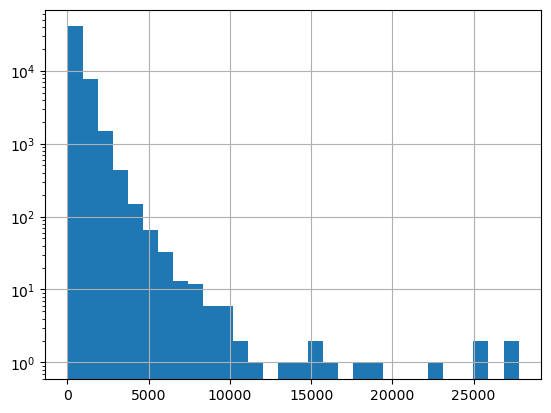

In [10]:
df['Body'].apply(len).hist(log=True, bins=30); plt.show()

In [11]:
to_drop = df[df['Body'].apply(len) > 9000]
df.drop(index=to_drop.index, inplace=True)
print(f"Nombre d'éléments supprimés : {len(to_drop)}")

Nombre d'éléments supprimés : 23


## Contraction

In [12]:
# Dictionnaire
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [13]:
contractions_re = re.compile('(%s)' % '|'.join(contractions.keys()))
def expand_contractions(s, contractions_dict=contractions):
    def replace(match):
        return contractions_dict[match.group(0)]
    
    return contractions_re.sub(replace, s)

In [ ]:
df['Title'] = df['Title'].apply(expand_contractions) 
df['Body'] = df['Body'].apply(expand_contractions)
# df['Body'][isa]

## Correction (non effectué)

In [15]:
spell = autocorrect.Speller()

def autocorrects(text):
    words = token.tokenize(text)
    words_correct = [spell(w) for w in words]
    return ' '.join(map(str, words_correct)) # Return the text untokenize

In [16]:
# # TROP LONG
# %%time
# df['Title'] = df['Title'].apply(lambda x: autocorrects(x)) 
# df['Body'] = df['Body'].apply(lambda x: autocorrects(x)) 

## Minuscules
Diminution de la casse ici car la contraction peut remettre des majuscules.  
Etape classique et utile pour supprimer le bruit et normaliser puisqu'elle réduit le vocabulaire, normalise le texte et est rapide à executer.

In [ ]:
df['Title'] = df['Title'].str.lower()
df['Body'] = df['Body'].str.lower()
# df['Body'][isa]

## Nombres

On conserve les caractères puisque souvent utilisés dans les languages, ainsi que les nombres lorsque suivant des lettres.

In [18]:
# def remove_non_alphabetical_character(text):
#     """remove all non-alphabetical character"""
# #     text = re.sub("\ +\.+[a-zA-Z]+[0-9]*|[a-zA-Z]+[0-9]*\#*\+*|42", " ", text) # remove all non-alphabetical character
# #     text = re.sub("[^a-z]+", " ", text) # remove all non-alphabetical character
#     text = re.sub("[^0-9$]", " ", text) # remove all non-alphabetical character
#     text = re.sub("\s+", " ", text) # remove whitespaces left after the last operation
#     return text
# remove_non_alphabetical_character('i am looking 42')

In [19]:
# df['Title'] = df['Title'].apply(lambda x: remove_non_alphabetical_character(x)) 
# df['Body'] = df['Body'].apply(lambda x: remove_non_alphabetical_character(x)) 

## Caractères seuls
On supprime les mots coposé d'un seul caractére puisque très utilisé en programmation pour définir des variables.

In [ ]:
charac = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~0123456789'

def remove_single_letter(text):
    """remove single alphabetical character"""    
        
    rules = [
        "\. |\.$|\n|\t",                      # points de fin, retours à la ligne, tabulations
        "w*?\.(?!net)(\w*?)",                 # points entres mots fichier.truc exception .net
        " [-+#]+\w*?|\w*?[-]+ ",              # mots commençant par des +-# ou terminant par +-
        "__",                                 # caractères de fonctions cachées 
        "\\x80",
        "[ 0-9][-+\*/^_]+[ 0-9]",             # operations entre nombres
        " [0-9]*|\.[0-9]+",                   # nombres seuls ou après un point
        '[!?\'"`^~$%&@,;:(){}[\]\|<=>/\\\\]', # caractères spécifiques
        " . ",                                # caractère seul
        "^ | $",                              # espace de début et de fin
    ]
    for rule in rules *2:
        text = re.sub(rule, " ", text) 
    
    while "  " in text:
        text = text.replace("  ", " ")
    return text

In [ ]:
df['Title'] = df['Title'].apply(remove_single_letter) 
df['Body'] = df['Body'].apply(remove_single_letter)
# df['Body'][isa]

# Stopwords

## Mots les plus fréquents
La suppression des mots les plus récurrents est une étape pluassique en NLP.  
Les mots les plus fréquents n'ajoutent pas d'information dans la plupart des cas puisqu'ils sont dans la plupart des phrases.  
Les supprimer laisse plus de liberté aux autres mots de *s'exprimer*.

In [22]:
stop_words = set(nltk.corpus.stopwords.words("english"))

def remove_stopwords(text):
    """remove common words in english by using nltk.corpus's list"""
    words = token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    
    return ' '.join(map(str, filtered)) # Return the text untokenize

In [ ]:
df['Title'] = df['Title'].apply(lambda x: remove_stopwords(x))
df['Body'] = df['Body'].apply(lambda x: remove_stopwords(x)) 
# df['Body'][isa]

## Adjectifs
Les adjectifs ont peut de chances d'être utilisé comme tags et ne semblent pas pertinent ici, n'ajoutant pas plus d'information.  
Dans le cas des verbes, la plupart des commandes de programmation en utilisent donc les retirer semble problématique.

In [24]:
def remove_by_tag(text, undesired_tag):
    """remove all words by using ntk tag (adjectives, verbs, etc.)"""
    words = token.tokenize(text)
    # Tag each words and return a list of tuples (e.g. ("have", "VB"))
    words_tagged = nltk.pos_tag(tokens=words, tagset=None, lang='eng')
    # Select all words that don't have the undesired tags
    filtered = [w[0] for w in words_tagged if w[1] not in undesired_tag]
    
    return ' '.join(map(str, filtered)) # Return the text untokenize

In [ ]:
%%time
adjective_tag_list = set(['JJ','JJR', 'JJS', 'RBR', 'RBS']) # List of Adjective's tag from nltk package
df['Title'] = df['Title'].apply(lambda x: remove_by_tag(x, adjective_tag_list))
df['Body'] = df['Body'].apply(lambda x: remove_by_tag(x, adjective_tag_list))
# df['Body'][isa]

# Stemming

Moins couteux de placer le stemming ici. 
Il consiste à réduire des mots fléchis sous forme de racine ou de base ("fishing", "fished" et "fisher" à la racine "fish").  
Il fonctionne généralement en supprimant l'affixe d'un mot, suffixe ou préfixe (par exemple, "-ed", "-ing", etc.). 
Assez simple mais ne fonctionnera pas pour les mots "irréguliers" ("ran" et "run"). 

A considérer simplement comme une opération plus simple que la lemmatisation, qui peut être suffisante dans certains cas, mais peut faire trop d'erreurs dans d'autres cas.

In [26]:
stemmer = nltk.stem.snowball.EnglishStemmer()

def stem_text(text):
    """Stem the text"""
    words = token.tokenize(text.replace('-',''))  # Suppression de - pour les mots combinés "c-language"
    stem_text = []
    for word in words:
        stem_text.append(stemmer.stem(word)) # Stem each words
    return " ".join(stem_text) # Return the text untokenize

In [ ]:
%%time
df['Title'] = df['Title'].apply(lambda x: stem_text(x)) 
df['Body'] = df['Body'].apply(lambda x: stem_text(x)) 
# df['Body'][isa]

# Lemmatisation (non effectué)
Processus de remplacement de la forme fléchie d'un mot par son lemme (forme canonique ou forme dictionnaire). 
Mais dans certains cas, un lemmatiseur n'est pas capable de trouver la bonne racine sans préciser au préalable le type de mot.

In [31]:
def lemmatize_text(text):
    """Lemmatize the text by using tag """
    
    tokens_tagged = nltk.pos_tag(tokenize(text))  # tokenize the text then return a list of tuple (token, nltk_tag)
    lemmatized_text = []
    for word, tag in tokens_tagged:
        if tag.startswith('J'):
            lemmatized_text.append(lemmatizer.lemmatize(word,'a')) # Lemmatisze adjectives. Not doing anything since we remove all adjective
        elif tag.startswith('V'):
            lemmatized_text.append(lemmatizer.lemmatize(word,'v')) # Lemmatisze verbs
        elif tag.startswith('N'):
            lemmatized_text.append(lemmatizer.lemmatize(word,'n')) # Lemmatisze nouns
        elif tag.startswith('R'):
            lemmatized_text.append(lemmatizer.lemmatize(word,'r')) # Lemmatisze adverbs
        else:
            lemmatized_text.append(lemmatizer.lemmatize(word)) # If no tags has been found, perform a non specific lemmatization
    return " ".join(lemmatized_text) # Return the text untokenize

In [32]:
# %%time
# df['Title'] = df['Title'].apply(lambda x: lemmatize_text(x)) 
# df['Body'] = df['Body'].apply(lambda x: lemmatize_text(x)) 
# df['Body'][isa]

# Fusion
Si l'on considère les mots du titre plus important que le corps pour la détermination des tags, essayons de combiner deux fois le titre avec le corps

In [33]:
df['Text'] = (df['Title'] +' '+ df['Title'] +' '+ df['Body'])

In [ ]:
# df['Body'].iloc[isa]

# Traitement des Tags

In [35]:
df['Tags'] = df['Tags'].apply(lambda x: re.sub('><|^<|>$', " ", x))

# Tokenisation

In [36]:
# tokenizer = nltk.RegexpTokenizer(r"\ +\.+[a-zA-Z]+[0-9]*|[a-zA-Z]+[0-9]*\#*\+*\-*|42")

# def tokenize(text):
# #     return nltk.wordpunct_tokenize(text)
# #     return nltk.word_tokenize(text)
#     return [s.replace(" ", "") for s in tokenizer.tokenize(text)]

# df['Body'].apply(tokenize).loc[isa]
# # df['bag_title'] = df['Title'].apply(tokenize)
# # df['bag_body'] = df['Body'].apply(tokenize)
# # print(df['bag_body'].loc[isa])

## Fréquences

In [37]:
%%time
all_words = df['Text'].str.split().sum()
all_tags = df['Tags'].str.split().sum()

Wall time: 19min 43s


In [38]:
freq_words = nltk.FreqDist(all_words)
freq_tags = nltk.FreqDist(all_tags)

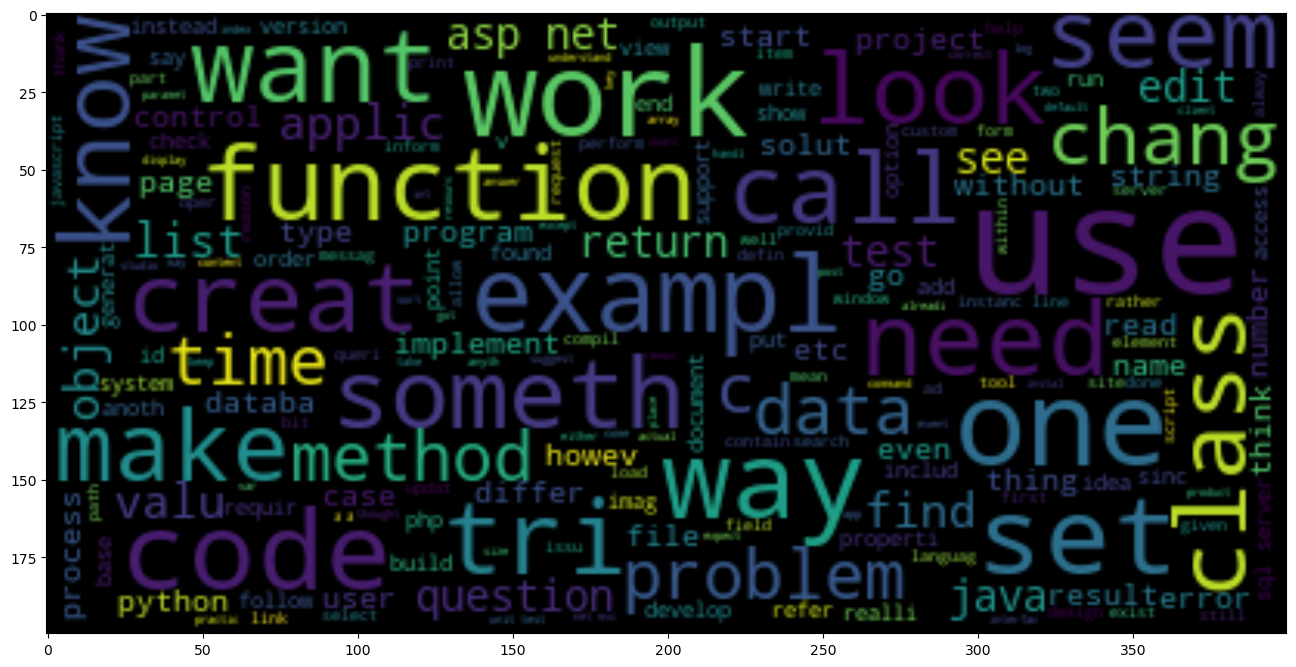

In [39]:
# Nuage des mots
total_text = ' '.join(all_words)
wc = WordCloud(background_color='black',max_font_size=50).generate(total_text)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation='bilinear')
plt.show()

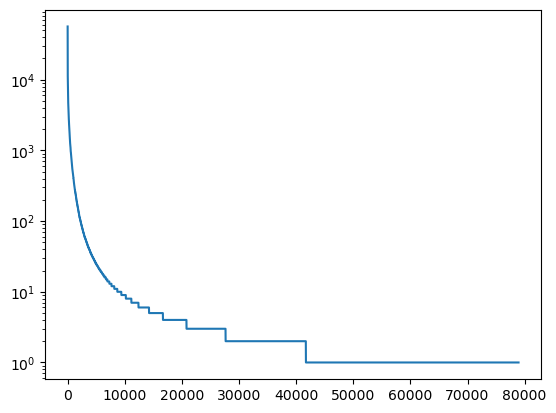

In [40]:
# Echelle LOG de la fréquence des mots
freq_dist = nltk.FreqDist(all_words)
plt.plot(sorted(freq_dist.values(), reverse=True)); plt.yscale('log'); plt.show()

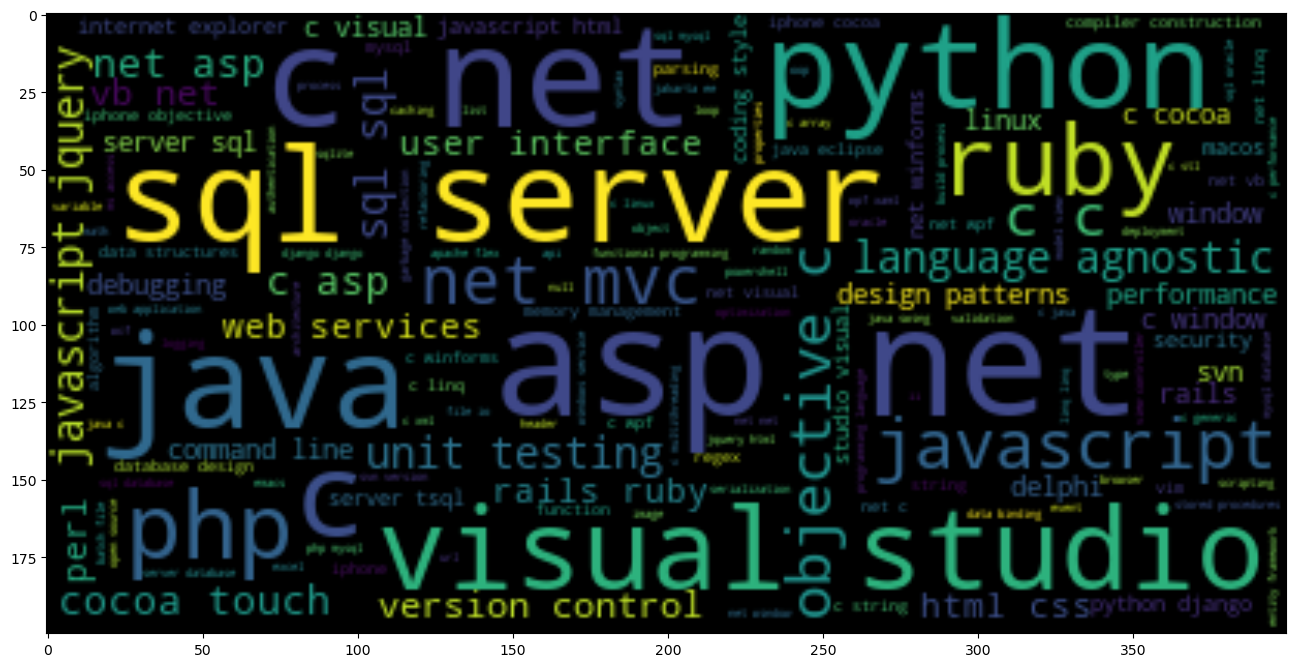

In [41]:
# Nuage des tags
total_tags = ' '.join(all_tags)
wc = WordCloud(background_color='black',max_font_size=50).generate(total_tags)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation='bilinear')
plt.show()

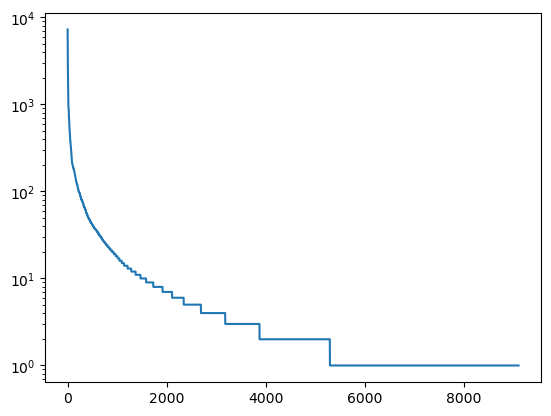

In [42]:
# Echelle LOG de la fréquence des tags
freq_dist = nltk.FreqDist(all_tags)
plt.plot(sorted(freq_dist.values(), reverse=True)); plt.yscale('log'); plt.show()

## Mots communs
* Suppression des tokens n'apparaissant que peu ($<10$)

In [43]:
nb_commun = 10
common_words = {k:v for k,v in freq_words.items() if v > nb_commun}
common_tags = {k:v for k,v in freq_tags.items() if v > nb_commun}

In [44]:
print(f"# mots (communs) = {len(freq_words)} ({len(common_words)})")
print(f"# tags (communs) = {len(freq_tags)} ({len(common_tags)})")
print(f"# commun / # textes = {nb_commun / len(df) * 100:.2f}%")

# mots (communs) = 78938 (8685)
# tags (communs) = 9110 (1471)
# commun / # textes = 0.02%


In [45]:
def t_common_words(x):
    tokens = x.split()
    common_tokens = [t for t in tokens if t in common_words.keys()]
    return ' '.join(common_tokens)

def t_common_tags(x):
    tokens = x.split()
    common_tokens = [t for t in tokens if t in common_tags.keys()]
    return ' '.join(common_tokens)

In [46]:
df['Text'] = df['Text'].apply(t_common_words)
df['Tags'] = df['Tags'].apply(t_common_tags)

# Sauvegarde

In [47]:
df = df[['Text', 'Tags']]
df.columns=['X','Y']
df.to_csv('questions_tags_cleaned.csv', index=False)